In [12]:
import numpy as np
import cv2 as cv
cap = cv.VideoCapture(0)
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    # Our operations on the frame come here
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # Display the resulting frame
    cv.imshow('frame',gray)
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
# When everything done, release the capture
cap.release()
del frame
cv.destroyAllWindows()

In [18]:
import cv2

#-----Reading the image-----------------------------------------------------
img = cv2.imread('pic27c.jpg', 1)
#cv2.imshow("img",img) 

#-----Converting image to LAB Color model----------------------------------- 
lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
#cv2.imshow("lab",lab)

#-----Splitting the LAB image to different channels-------------------------
l, a, b = cv2.split(lab)
#cv2.imshow('l_channel', l)
#cv2.imshow('a_channel', a)
#cv2.imshow('b_channel', b)

#-----Applying CLAHE to L-channel-------------------------------------------
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
cl = clahe.apply(l)
#cv2.imshow('CLAHE output', cl)

#-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
limg = cv2.merge((cl,a,b))
#cv2.imshow('limg', limg)

#-----Converting image from LAB Color model to RGB model--------------------
final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
cv2.imwrite('pic27cln.jpg', final)


True

In [19]:
import cv2
img1=cv2.imread("pic27c.jpg")
img2=cv2.imread("pic27cln.jpg")
img=(img1+img2)/2
cv2.imwrite("pic27cln+c.jpg",img)

True

In [21]:
a=np.array(img1,int)
b=np.array(img2,int)
img_x=(a+b)/2
cv2.imwrite("pic27cln+cx.jpg",img_x)

True

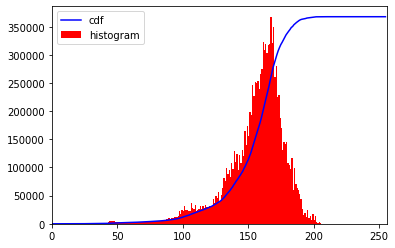

In [23]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('pic27cln+cx.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [3]:
import numpy as np
import cv2 as cv

img = cv.imread('pic27cln.jpg',0)
equ = cv.equalizeHist(img)
#res = np.hstack((img,equ)) #stacking images side-by-side
cv.imwrite('pic27clnh.jpg',equ)

True

In [36]:
img = cv2.imread('pic27cln.jpg',0)
ret,th1 = cv2.threshold(img,115,255,cv2.THRESH_BINARY)
cv2.imwrite("pic27clnt.jpg",th1)

True